# **Market Segmentation of Electronic Vehicles in India**

# **Data Pre-Processing**

In [ ]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Read & loading Dataset
df = pd.read_csv("Electric_Car_Data.csv")
df


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


# **Data Exploration**

The head() returns the first n rows for the object based on position. If your object has the right type of data in it, it is useful for quick testing. This method is used for returning top n (by default value 5) rows of a data frame or series. In this I have taken first 10 values.

In [ ]:
df.head(10)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
5,Lucid,Air,2.8,250,610,180,620,Yes,AWD,Type 2 CCS,Sedan,F,5,105000
6,Volkswagen,e-Golf,9.6,150,190,168,220,Yes,FWD,Type 2 CCS,Hatchback,C,5,31900
7,Peugeot,e-208,8.1,150,275,164,420,Yes,FWD,Type 2 CCS,Hatchback,B,5,29682
8,Tesla,Model 3 Standard Range Plus,5.6,225,310,153,650,Yes,RWD,Type 2 CCS,Sedan,D,5,46380
9,Audi,Q4 e-tron,6.3,180,400,193,540,Yes,AWD,Type 2 CCS,SUV,D,5,55000


The tail() function displays the last 5 rows of dataframe.

In [ ]:
df.tail()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000
102,Byton,M-Byte 95 kWh 2WD,7.5,190,400,238,480,Yes,AWD,Type 2 CCS,SUV,E,5,62000


The shape function is used o find the shape of the dataframe.It holds the number of rows followed by the number of columns.

In [ ]:
df.shape


(103, 14)

The info() function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. Whether to print the full summary.


In [ ]:
#No null values found
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.

In [ ]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


The iloc() function enables us to select a particular cell of the dataset, that is, it helps us select a value that belongs to a particular row or column from a set of values of a data frame or dataset.

In [ ]:
ilocfunc = df.iloc[:,0:9]
ilocfunc

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD
2,Polestar,2,4.7,210,400,181,620,Yes,AWD
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD
4,Honda,e,9.5,145,170,168,190,Yes,RWD
...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD


In [ ]:
#checking whether there is any null value or not
df.isnull().sum()

,0
Brand,0
Model,0
AccelSec,0
TopSpeed_KmH,0
Range_Km,0
Efficiency_WhKm,0
FastCharge_KmH,0
RapidCharge,0
PowerTrain,0
PlugType,0


In [ ]:
#cheking for duplicate rows in the dataset
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

***Categorical Encoding:- It is the process of converting categorical data into integer format.***

In [ ]:
df['Brand'] = df['Brand'].astype('category')
df['Model'] = df['Model'].astype('category')
df['AccelSec'] = df['AccelSec'].astype('category')
df['TopSpeed_KmH'] = df['TopSpeed_KmH'].astype('category')
df['Range_Km'] = df['Range_Km'].astype('category')
df['Efficiency_WhKm'] = df['Efficiency_WhKm'].astype('category')
df['FastCharge_KmH'] = df['FastCharge_KmH'].astype('category')
df['RapidCharge'] = df['RapidCharge'].astype('category')
df['PowerTrain'] = df['PowerTrain'].astype('category')
df['PlugType'] = df['PlugType'].astype('category')
df['BodyStyle'] = df['BodyStyle'].astype('category')
df['Segment'] = df['Segment'].astype('category')
df['Seats'] = df['Seats'].astype('category')
df['PriceEuro'] = df['PriceEuro'].astype('category')

In [ ]:
df.dtypes

,0
Brand,category
Model,category
AccelSec,category
TopSpeed_KmH,category
Range_Km,category
Efficiency_WhKm,category
FastCharge_KmH,category
RapidCharge,category
PowerTrain,category
PlugType,category


In [ ]:
df['Brand'] = df['Brand'].cat.codes
df['Model'] = df['Model'].cat.codes
df['AccelSec'] = df['AccelSec'].cat.codes
df['TopSpeed_KmH'] = df['TopSpeed_KmH'].cat.codes
df['Range_Km'] = df['Range_Km'].cat.codes
df['Efficiency_WhKm'] = df['Efficiency_WhKm'].cat.codes
df['FastCharge_KmH'] = df['FastCharge_KmH'].cat.codes
df['RapidCharge'] = df['RapidCharge'].cat.codes
df['PowerTrain'] = df['PowerTrain'].cat.codes
df['PlugType'] = df['PlugType'].cat.codes
df['BodyStyle'] = df['BodyStyle'].cat.codes
df['Segment'] = df['Segment'].cat.codes
df['Seats'] = df['Seats'].cat.codes
df['PriceEuro'] = df['PriceEuro'].cat.codes

In [ ]:
df.dtypes
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,30,46,11,18,42,5,50,1,0,2,7,3,2,52
1,31,33,46,9,15,9,7,1,2,2,1,2,2,11
2,23,0,12,15,35,21,36,1,0,2,2,3,2,53
3,2,101,26,12,28,32,32,1,2,2,6,3,2,64
4,9,78,41,5,4,10,2,1,2,2,1,1,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,20,6,30,9,24,25,21,1,1,2,1,2,2,43
99,1,94,10,15,25,49,30,1,0,2,6,4,2,75
100,20,8,20,14,23,27,21,1,0,2,1,2,2,47
101,20,10,16,14,31,44,22,1,0,2,1,2,2,61


# **Data Visualization**

Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.

KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. It depicts the probability density at different values in a continuous variable. We can also plot a single graph for multiple samples which helps in more efficient data visualization.

# **Distribution of Numeric Attributes**

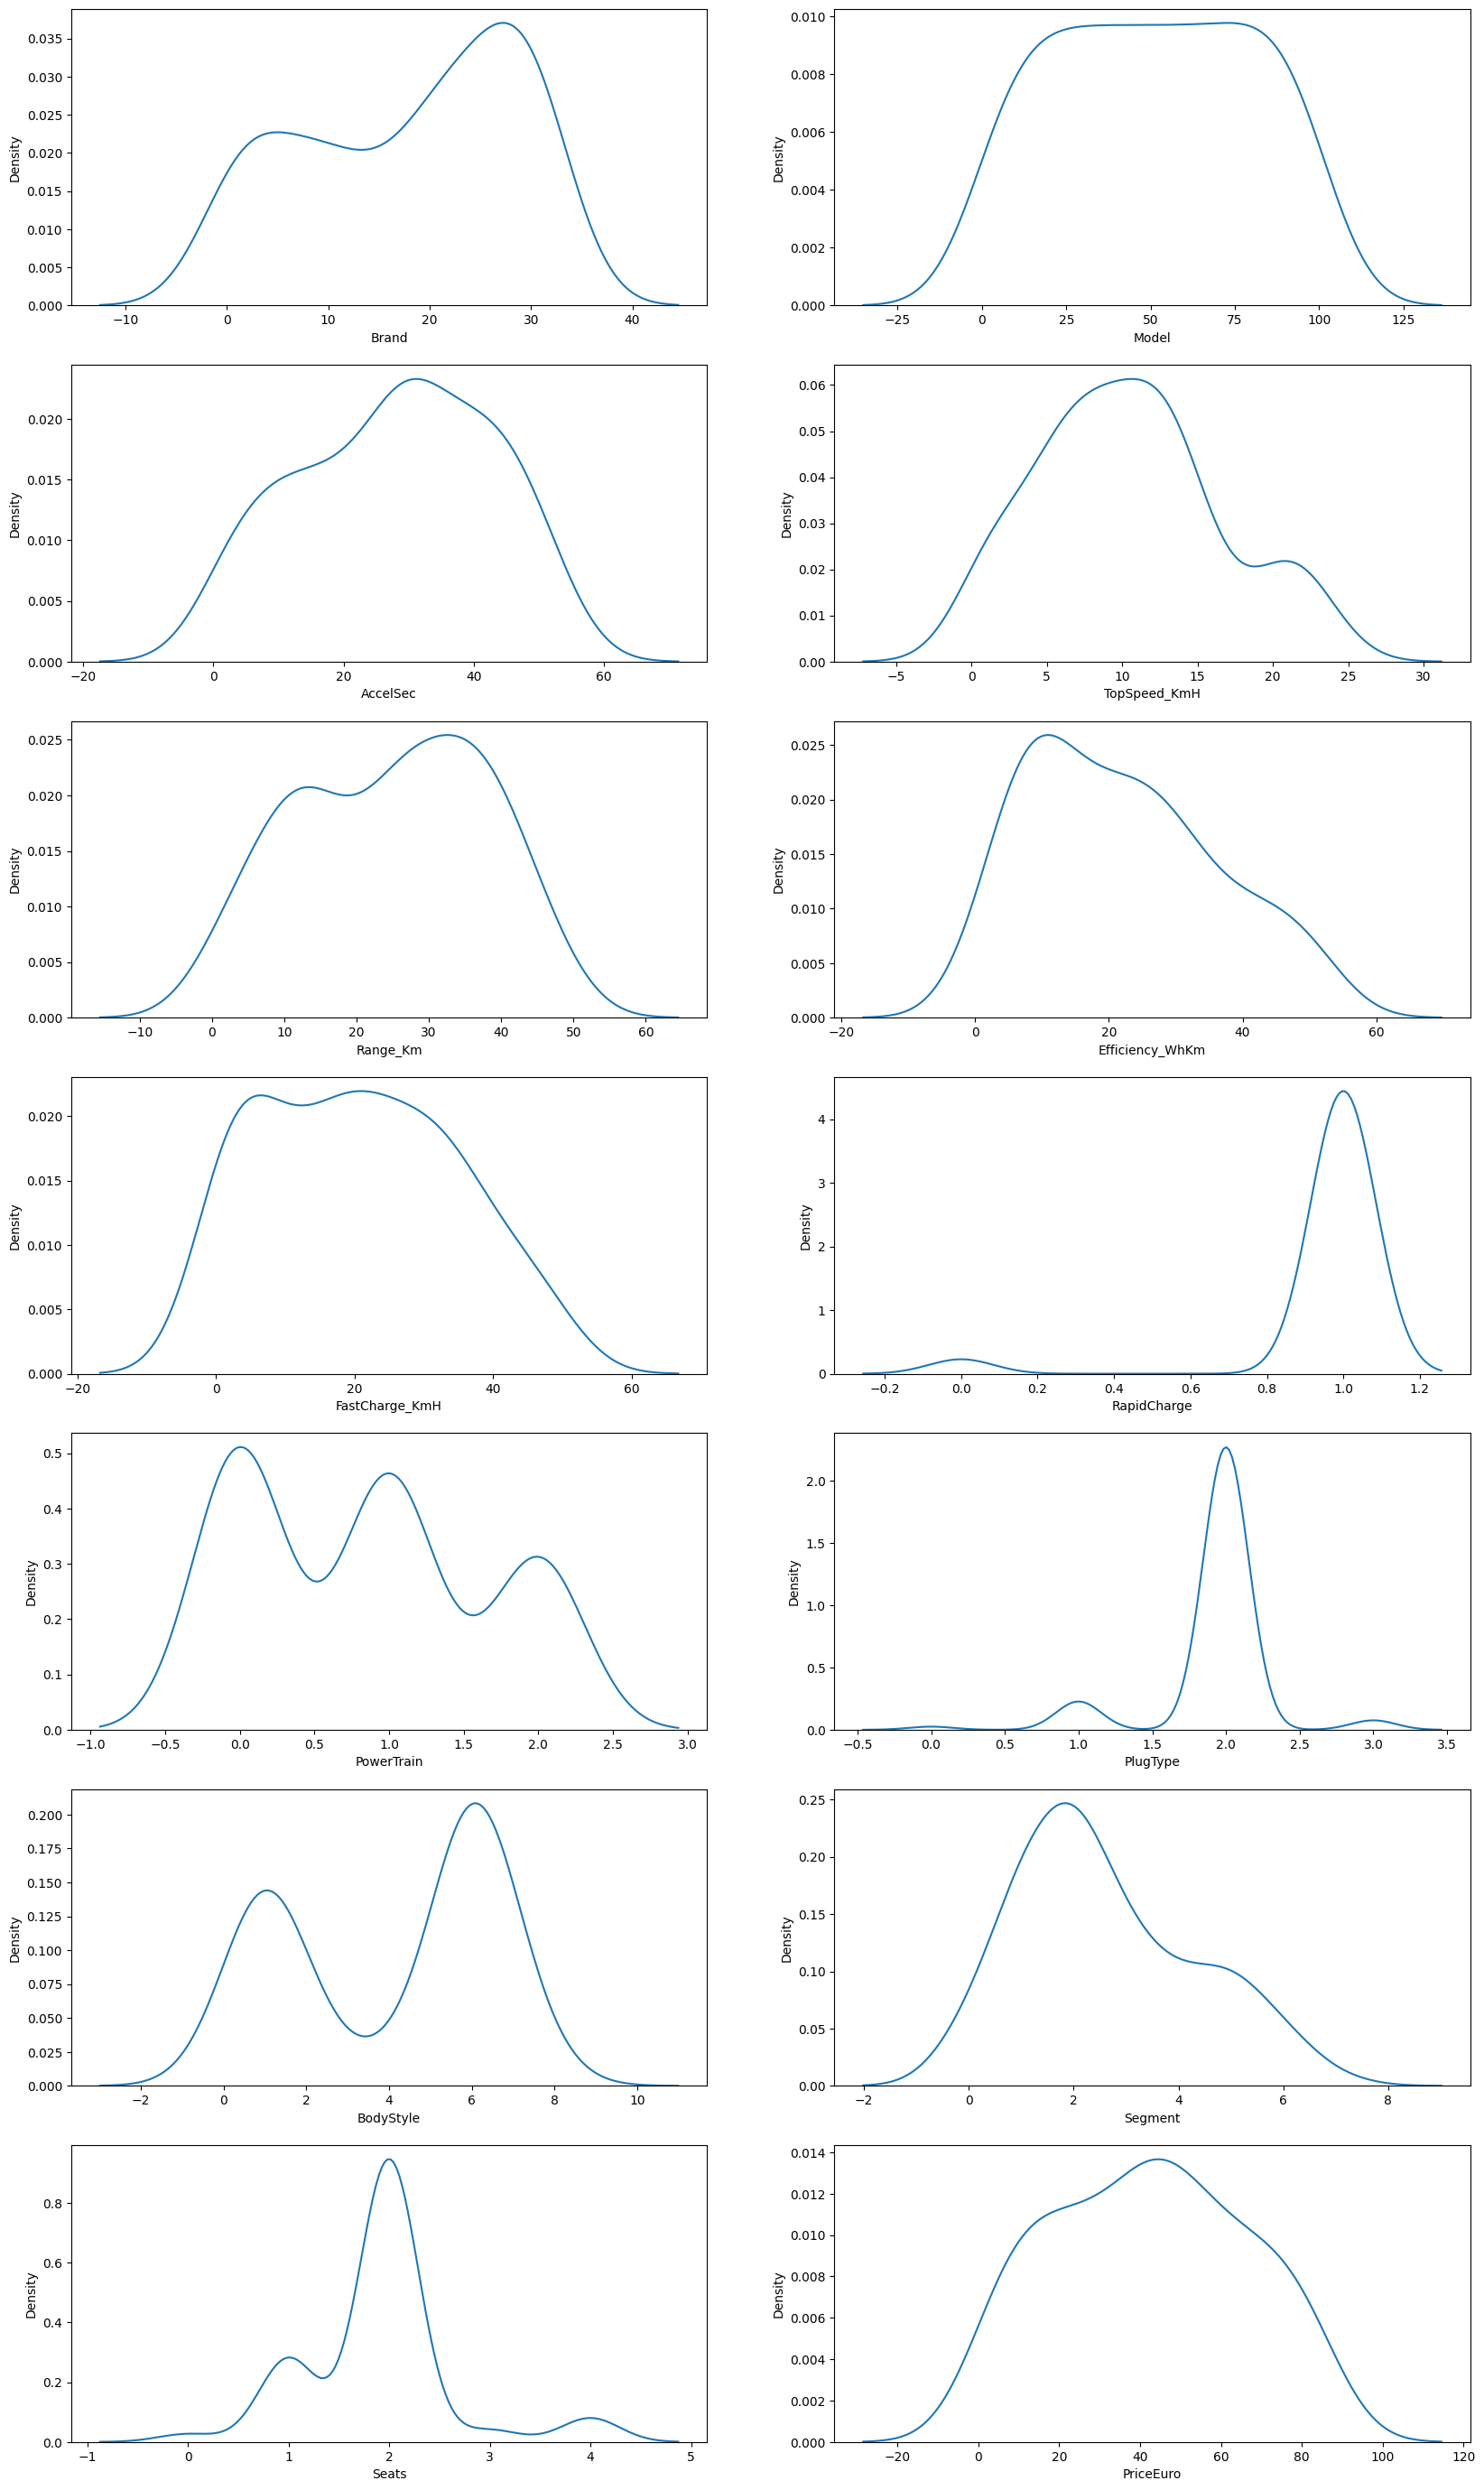

In [ ]:
#It tells you where is the density of the atrributes in the dataset
plt.figure(figsize=(20,35))
for i, col in enumerate (df.columns):
  if df[col].dtype != 'object':
    ax = plt.subplot(7, 2, i+1)
    sns.kdeplot(df[col], ax=ax)
    plt.xlabel(col)

plt.show()

In [ ]:
a=np.arange(1,104)

# **Frequency of EV Brands in the Dataset**

In [ ]:
import seaborn as sb

<ipython-input-21-368d6acb365d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Brand',y=a,data=df,palette='husl')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32')])

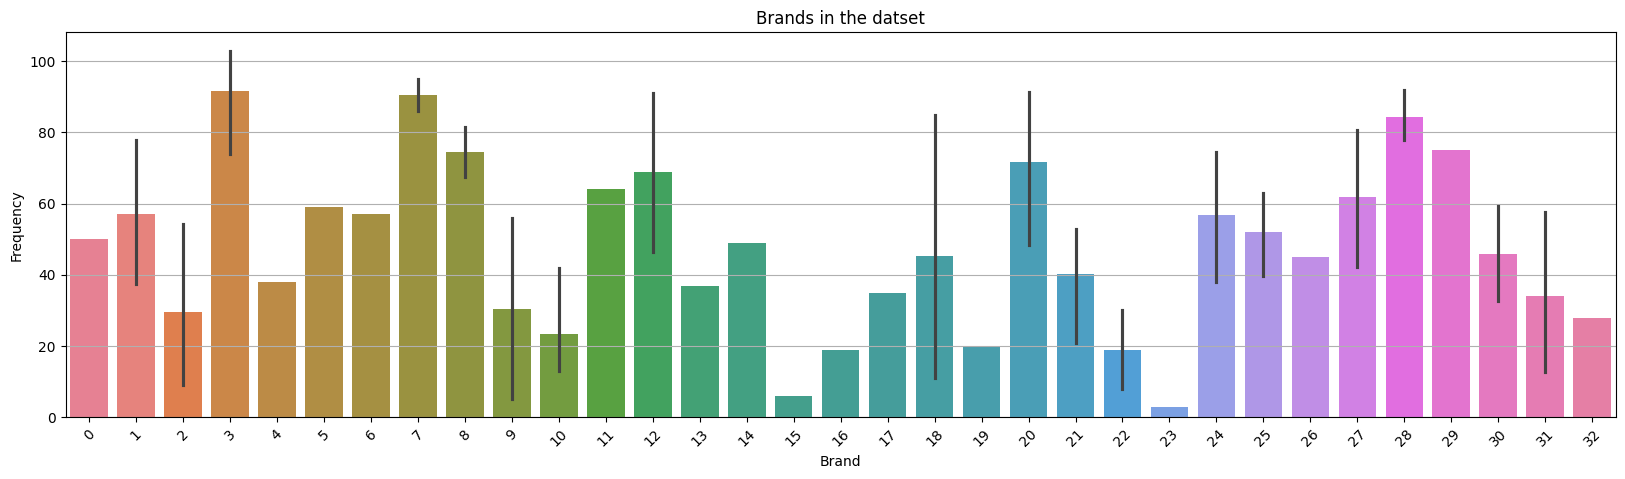

In [ ]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y=a,data=df,palette='husl')
plt.grid(axis='y')
plt.title('Brands in the datset')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)


# **Seat Capacity Distribution Across EV Brands**

<ipython-input-22-dc1310c0850d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Brand',y='Seats',data=df,palette='husl')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32')])

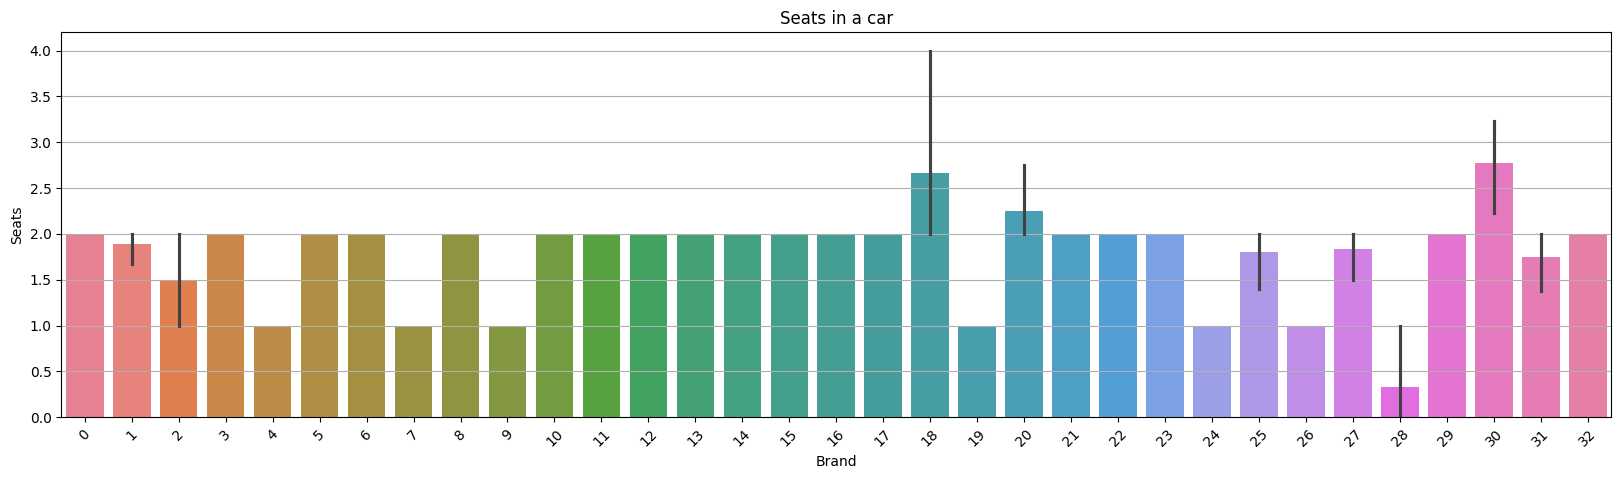

In [ ]:
#Number of seats in each car
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='Seats',data=df,palette='husl')
plt.grid(axis='y')
plt.title('Seats in a car')
plt.xlabel('Brand')
plt.ylabel('Seats')
plt.xticks(rotation=45)

# **Top Speed Performance by EV Brand**

<ipython-input-23-70d70f924bf0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Brand',y='TopSpeed_KmH',data=df,palette='Paired')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32')])

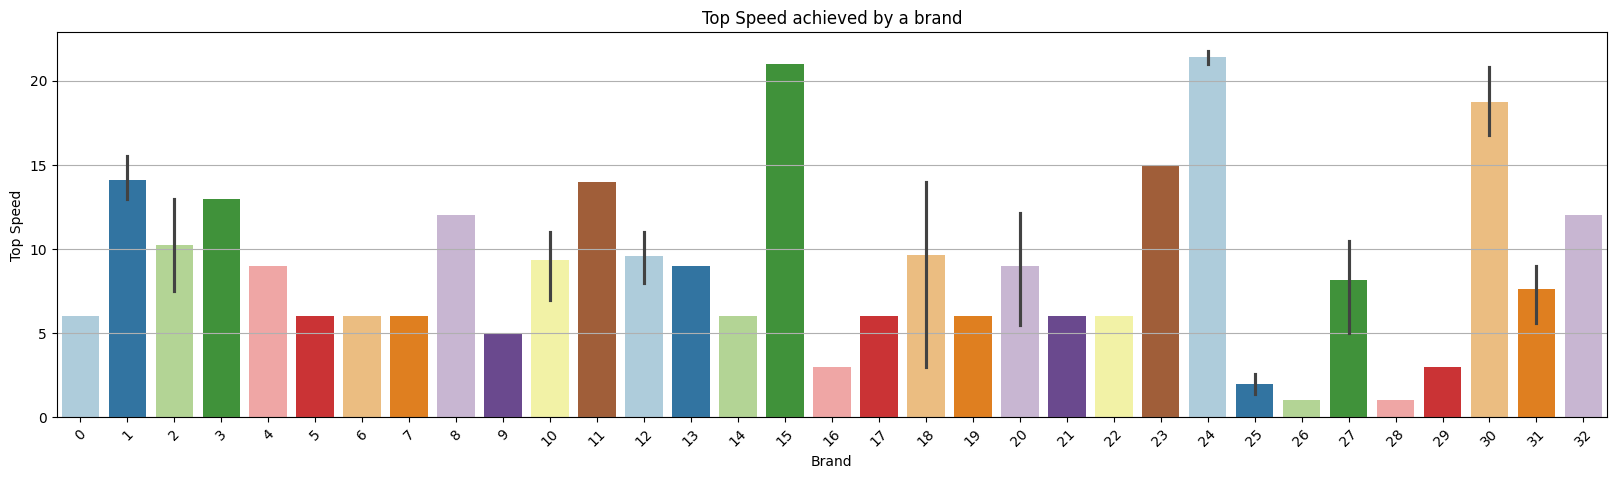

In [ ]:
#Top speeds achieved by the cars of a brand
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='TopSpeed_KmH',data=df,palette='Paired')
plt.grid(axis='y')
plt.title('Top Speed achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Top Speed')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Plug Type')

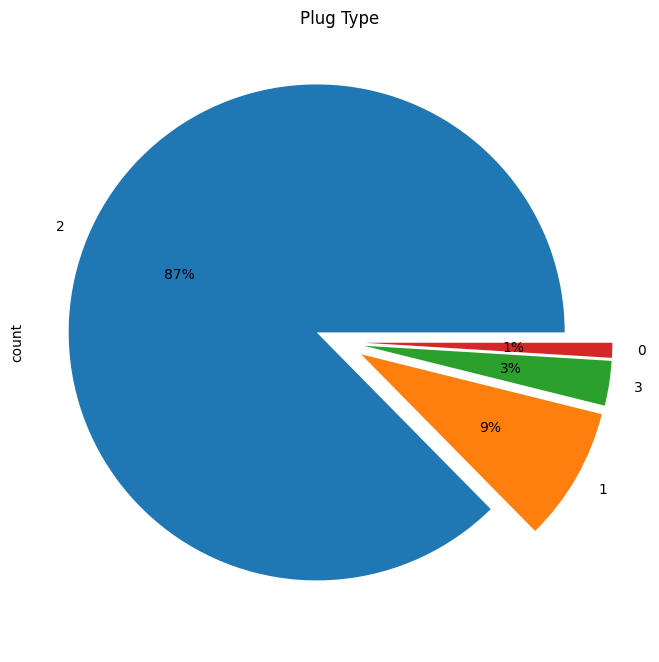

In [ ]:
#Type of Plug used for charging
df['PlugType'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(.1,.1,.1,.1))
plt.title('Plug Type')

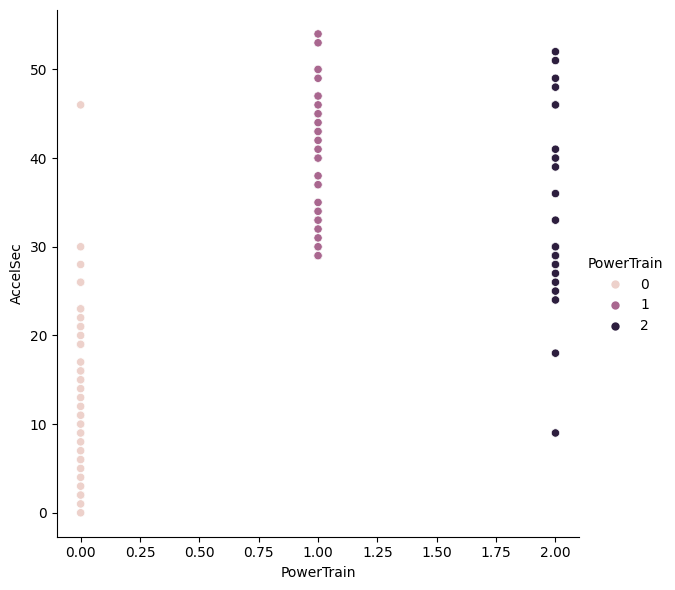

In [ ]:
sns.relplot(x="PowerTrain", y="AccelSec", height=6,hue="PowerTrain",data=df)

A histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution. The matplotlib.pyplot.hist() function is used to compute and create histogram of x.

The corr() function is used to find the pairwise correlation of all columns in the dataframe.

In [ ]:
df.corr()


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
Brand,1.000000,-0.401572,0.010264,0.021076,0.060537,-0.221659,0.100688,-0.188137,0.056464,-0.231104,-0.275860,-0.002040,0.122233,-0.190202
Model,-0.401572,1.000000,-0.050879,0.057176,-0.077762,0.022491,0.005442,0.144293,-0.007609,0.023750,0.261255,0.068414,-0.049640,0.111227
AccelSec,0.010264,-0.050879,1.000000,-0.920673,-0.737660,-0.497302,-0.802117,-0.352552,0.610827,-0.112838,-0.396870,-0.603694,-0.168084,-0.831104
TopSpeed_KmH,0.021076,0.057176,-0.920673,1.000000,0.756068,0.444486,0.817411,0.349092,-0.567529,0.054147,0.477244,0.650718,0.189824,0.843350
Range_Km,0.060537,-0.077762,-0.737660,0.756068,1.000000,0.424530,0.821237,0.411901,-0.467350,0.104279,0.351384,0.595759,0.335400,0.768121
Efficiency_WhKm,-0.221659,0.022491,-0.497302,0.444486,0.424530,1.000000,0.405366,0.116273,-0.447413,-0.060855,0.433367,0.679746,0.302620,0.665857
FastCharge_KmH,0.100688,0.005442,-0.802117,0.817411,0.821237,0.405366,1.000000,0.331404,-0.458178,0.126715,0.397805,0.616686,0.201503,0.762814
RapidCharge,-0.188137,0.144293,-0.352552,0.349092,0.411901,0.116273,0.331404,1.000000,-0.274797,0.539160,0.223577,0.189954,0.340828,0.306526
PowerTrain,0.056464,-0.007609,0.610827,-0.567529,-0.467350,-0.447413,-0.458178,-0.274797,1.000000,-0.039763,-0.349484,-0.497850,-0.263083,-0.617321
PlugType,-0.231104,0.023750,-0.112838,0.054147,0.104279,-0.060855,0.126715,0.539160,-0.039763,1.000000,0.066463,-0.163959,-0.095449,0.040580


See correlation between variables through a correlation heatmap

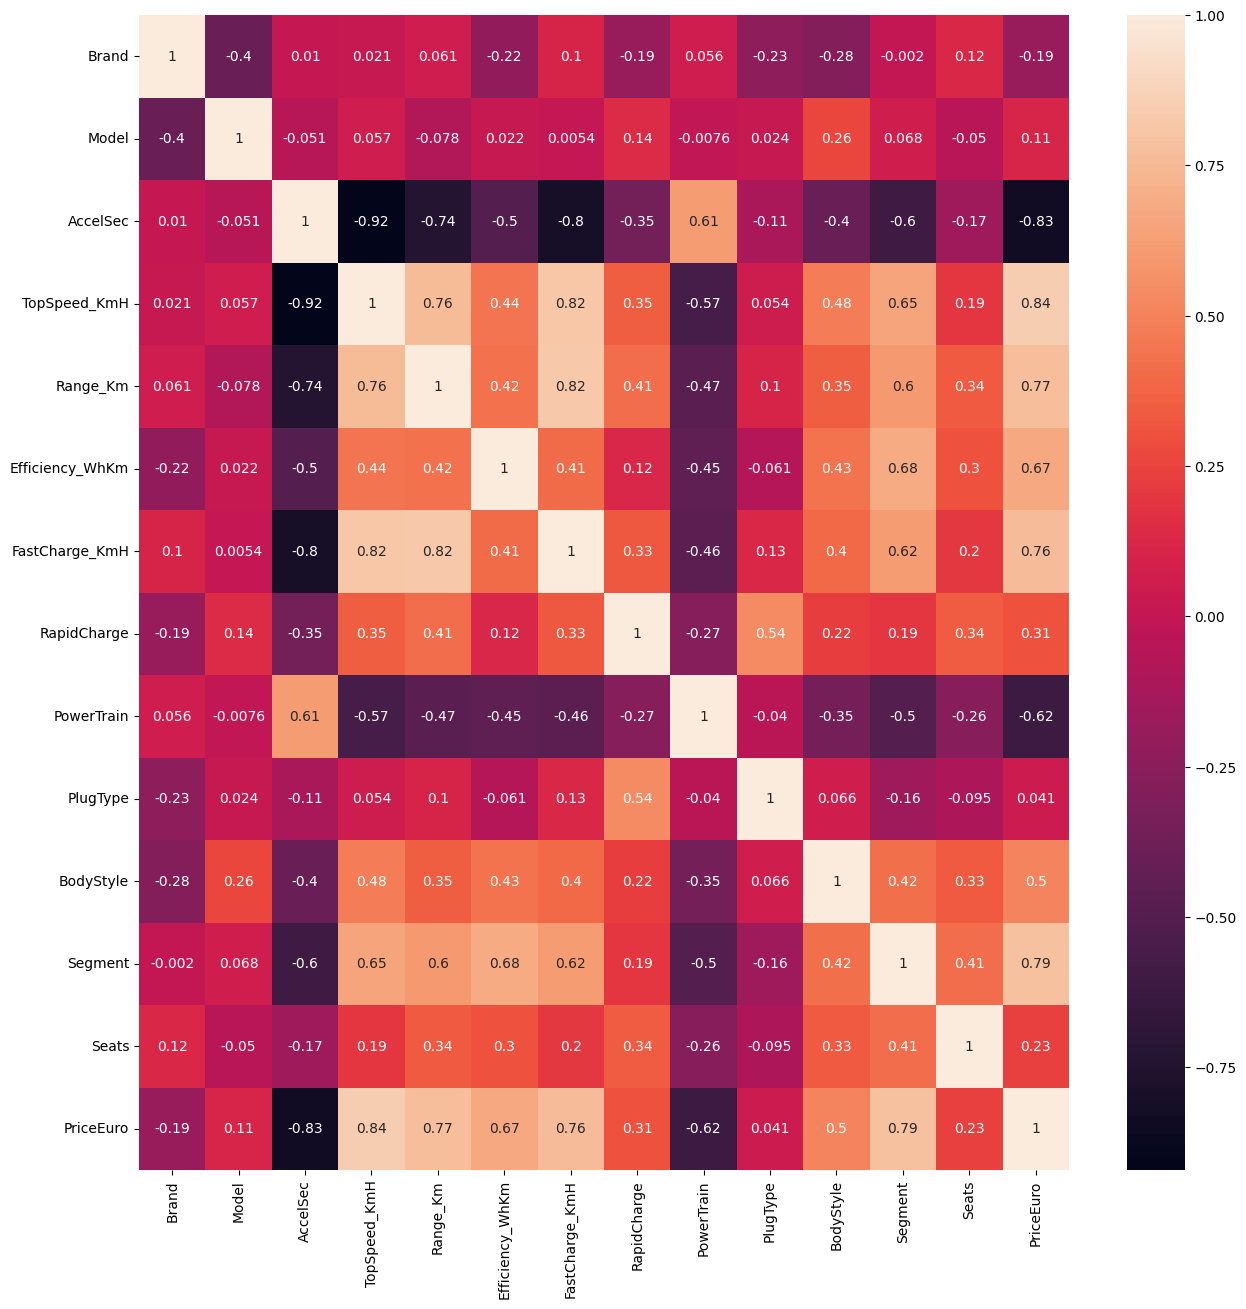

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

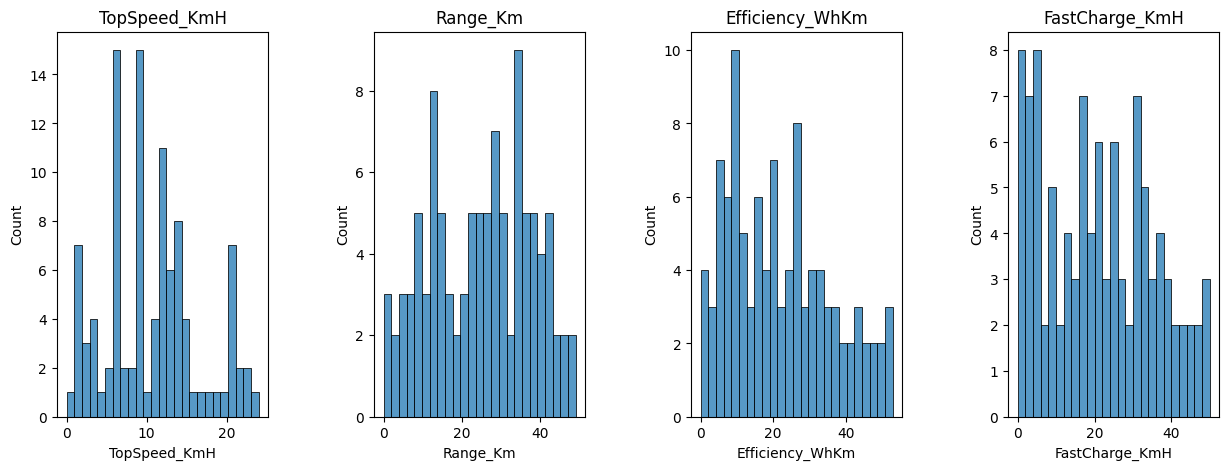

In [ ]:
plt.figure(1, figsize=(15,5))
n=0

for x in ['TopSpeed_KmH', 'Range_Km' ,'Efficiency_WhKm'  ,'FastCharge_KmH']:
  n += 1
  plt.subplot(1,4,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.histplot(df[x], bins= 25)
  plt.title(f'{x}')
plt.show()

# **K-Means Clustering**

In [ ]:
X = df.iloc[:, [3, 4]].values


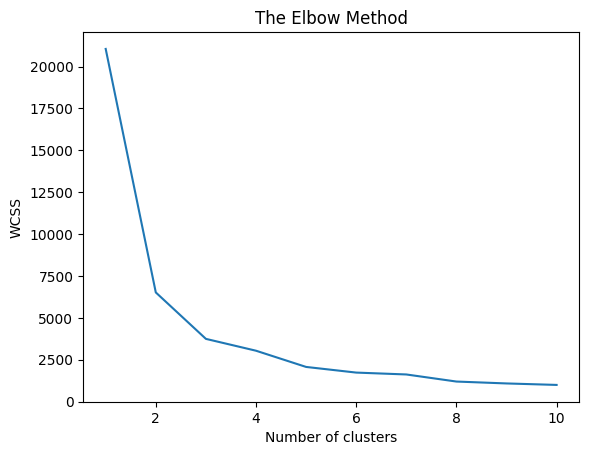

In [ ]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

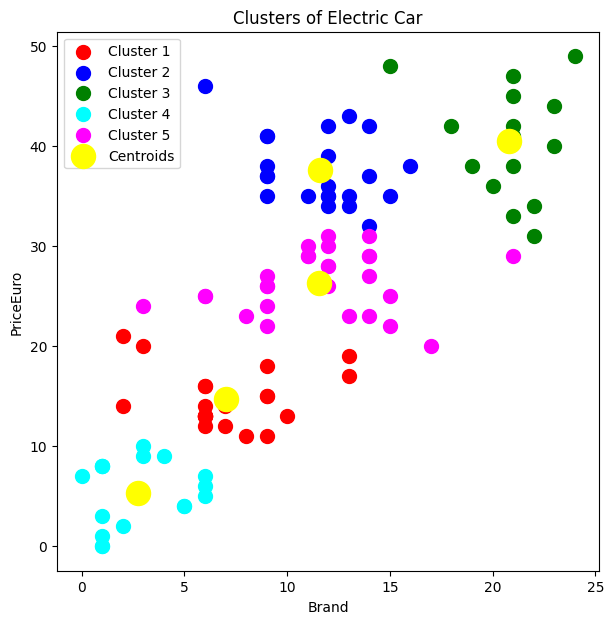

In [ ]:
# Visualising the clusters
plt.figure(figsize=(7,7))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Electric Car')
plt.xlabel('Brand')
plt.ylabel('PriceEuro')
plt.legend()
plt.show()

**Hierarchical Clustering:**

Agglomerative Clustering is a type of hierarchical clustering algorithm. It is an unsupervised machine learning technique that divides the population into several clusters such that data points in the same cluster are more similar and data points in different clusters are dissimilar

In [ ]:
# X = df.iloc[:, :-1].values
# y = df.iloc[:, 3].values

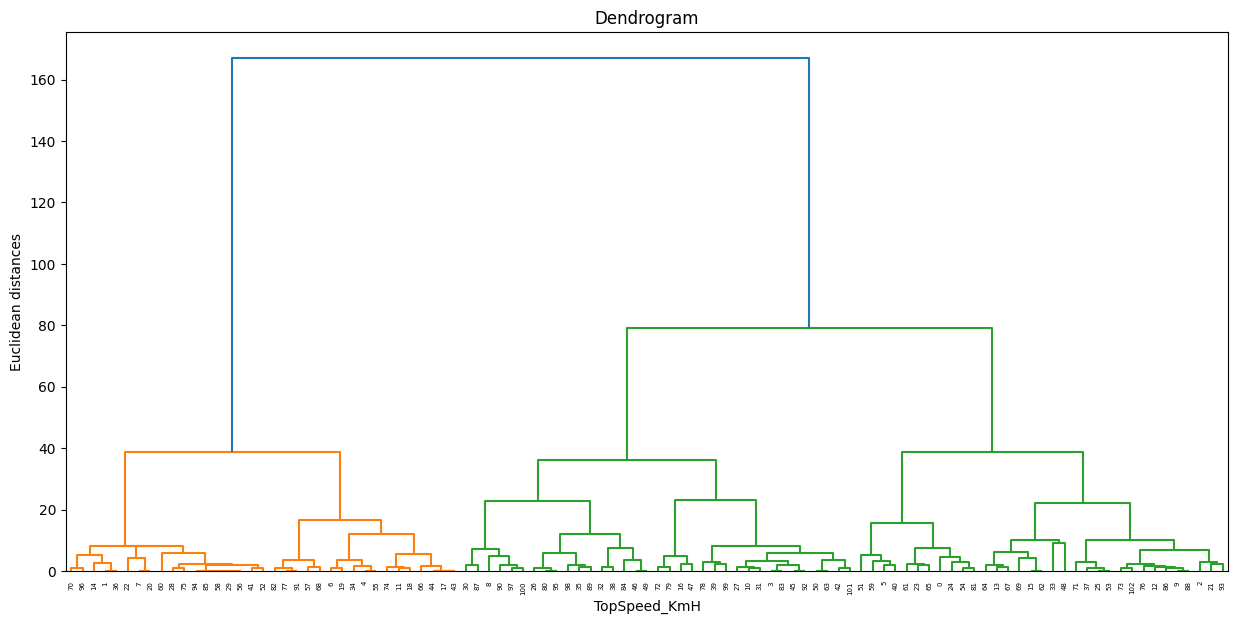

In [ ]:
# Using the dendrogram to find the optimal number of clusters for TopSpeed of Electric Car
plt.figure(figsize=(15,7))
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('TopSpeed_KmH')
plt.ylabel('Euclidean distances')
plt.show()